In [35]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [36]:
names = ["SVM", "Random Forest", "KNN" ]
classifiers = [
    KNeighborsClassifier(3),
    svm.SVC(kernel="linear", C=0.025),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)]

In [41]:
#function to calculate the accuracy 
def fit_predict(train_data, test_data, train_label , test_label):
    accuracies = []
    for name, model in zip(names, classifiers):
        model.fit(train_data, train_label)
        score = model.score(test_data, test_label)
        accuracies.append(score)
    
    SVM_acc = accuracies[0]
    RF_acc = accuracies[1]
    KNN_acc = accuracies[2]
    return SVM_acc,RF_acc,KNN_acc

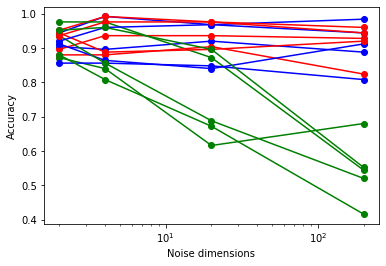

In [118]:
scaler = preprocessing.StandardScaler()
n_dim = 500
m_dim = 2
m_dim2 = 4
m_dim3 = 20
m_dim4 = 200
dims = [2,4,20,200]

mu = 0
gauss_noise1 = []
sigma = 0.1
for i in range(5):
    X,y = make_blobs(n_samples=samps, n_features=feats, centers=2, cluster_std=1.6, 
                   center_box=(-5.0, 5.0), shuffle=False) #Define dataset 
    
    X=scaler.fit_transform(X)
    
    gauss_noise1 = np.random.normal(mu, sigma, size = [n_dim, m_dim]) #noise of dim(500,2) with sigma = 0.1
    gauss_noise2 = np.random.normal(mu, sigma, size = [n_dim, m_dim2]) #noise of dim(500,4) with sigma = 0.1
    gauss_noise3 = np.random.normal(mu, sigma, size = [n_dim, m_dim3]) #noise of dim(500,20) with sigma = 0.1
    gauss_noise4 = np.random.normal(mu, sigma, size = [n_dim, m_dim4]) #noise of dim(500,200) with sigma = 0.1
    
    X1 = np.concatenate([X,gauss_noise1],axis = 1) #concat the 1st noise to the input data
    X2 = np.concatenate([X,gauss_noise2],axis = 1) #concat the 2nd noise to the input data
    X3 = np.concatenate([X,gauss_noise3],axis = 1) #concat the 3rd noise to the input data
    X4 = np.concatenate([X,gauss_noise4],axis = 1) #concat the 4th noise to the input data

    #Split data into training and testing 
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25) 
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25)
    X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.25)
    X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.25)
    
    #Calculate the accuracies for all the 4 noise dimensions
    svm1,rf1,knn1 =fit_predict(X1_train, X1_test, y1_train, y1_test)
    svm2,rf2,knn2 =fit_predict(X2_train, X2_test, y2_train, y2_test)
    svm3,rf3,knn3 =fit_predict(X3_train, X3_test, y3_train, y3_test)
    svm4,rf4,knn4 =fit_predict(X4_train, X4_test, y4_train, y4_test)
    
    #store in array for plotting
    svm = [svm1, svm2, svm3, svm4]
    rf = [rf1, rf2, rf3, rf4]
    knn = [knn1, knn2, knn3, knn4]

    #plot each accuracy for SVM, RF & KNN for 5 initialisation of the dataset and noise
    plt.plot(dims,svm, color = 'blue',marker='o')
    plt.plot(dims, rf, color ='red',marker='o')
    plt.plot(dims, knn, color = 'green',marker='o')
    
plt.xlabel('Noise dimensions')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()    
    
        
        